# Advent of Code: Day 9

In [1]:
using Base.Iterators
using DataStructures
using Match
using Underscores
using StatsKit
using Cairo
using Fontconfig
using Gadfly

#fn = "ExampleInput.txt"
fn = "SolutionInput.txt"

H = @_ readlines(fn)                    |>
       map(parse.(Int, collect(_)), __) |>
       copy(hcat(__...)')

100×100 Matrix{Int64}:
 6  5  4  3  6  5  6  7  9  9  9  8  9  …  6  7  8  9  9  5  4  3  2  3  4  5
 7  4  3  2  3  4  5  6  7  8  9  7  8     5  9  9  9  8  9  5  0  1  2  3  4
 6  5  4  3  4  5  6  7  8  9  5  6  7     9  8  9  8  7  8  9  1  2  4  4  9
 7  8  5  4  5  8  7  8  9  3  4  5  8     8  7  8  7  6  7  8  9  3  5  9  8
 8  9  6  7  6  7  8  9  3  2  3  4  7     7  6  5  4  5  6  7  8  9  9  8  7
 9  8  7  8  9  8  9  5  4  3  4  5  6  …  6  7  2  3  4  7  8  9  5  6  5  6
 9  9  8  9  6  9  7  6  5  9  5  6  7     5  6  1  2  3  8  9  5  4  3  4  5
 9  8  9  4  5  9  8  7  9  8  9  7  9     4  3  2  3  6  7  8  9  0  1  6  6
 8  7  4  3  4  5  9  9  8  7  8  9  8     5  4  3  4  5  6  9  2  1  2  7  8
 7  6  5  2  3  6  9  8  9  6  9  8  7     6  5  4  5  6  7  8  9  6  3  8  9
 8  9  9  3  4  9  8  7  6  5  8  7  9  …  7  6  7  8  7  9  9  6  5  4  5  6
 9  8  8  9  9  8  7  6  5  4  5  6  8     8  7  8  9  8  9  9  9  9  9  6  7
 8  7  7  8  9  9  8  5  4  3  2  1  2   

## Part 1

In [2]:
D = (N=CartesianIndex(-1,0),
     S=CartesianIndex( 1,0),
     E=CartesianIndex(0, 1),
     W=CartesianIndex(0,-1))

R(H) = begin
  R = zeros(size(H,1),size(H,2))
  for H_c ∈ CartesianIndices(H)
    b = @_ collect(D)                       |>
           map(_+H_c,__)                    |>
           filter(checkbounds(Bool,H,_),__) |>
           map(H[H_c]<H[_],__)              |>
           all
    if b; R[H_c] = H[H_c] + 1 end 
  end
  R
end

sum(R(H))

508.0

## Part 2

In [3]:
RC(H) = @_ R(H)    |> findall(_>0,__)
DI(H) = @_ copy(H) |> map(_!=9 ? 1 : 0,__)

floodfill!(M, c0, fv) = begin
  Q = [c0]
  while !isempty(Q)
    c = pop!(Q)

    if M[c] == 1
      cw = c
      ce = c + D.E
    else
      continue
    end

    while checkbounds(Bool, M, cw) && M[cw] == 1
      M[cw] = fv
      if checkbounds(Bool, M, cw + D.N) && M[cw + D.N] == 1
        push!(Q, cw + D.N)
      end
      if checkbounds(Bool, M, cw + D.S) && M[cw + D.S] == 1
        push!(Q, cw + D.S)
      end
      cw += D.W
    end

    while checkbounds(Bool, M, ce) && M[ce] == 1
      M[ce] = fv
      if checkbounds(Bool, M, ce + D.N) && M[ce + D.N] == 1
        push!(Q, ce + D.N)
      end
      if checkbounds(Bool, M, ce + D.S) && M[ce + D.S] == 1
        push!(Q, ce + D.S)
      end
      ce += D.E
    end
  end
  M
end

F = DI(H)
O = RC(H)

for (i,o) ∈ enumerate(O)
  floodfill!(F,o,i+1)
end

@_ F                 |>
   filter(_>0,__)    |>
   countmap          |>
   values            |>
   collect           |>
   sort(__;rev=true) |>
   take(__,3)        |>
   reduce(*,__)

1564640

## Visualisation

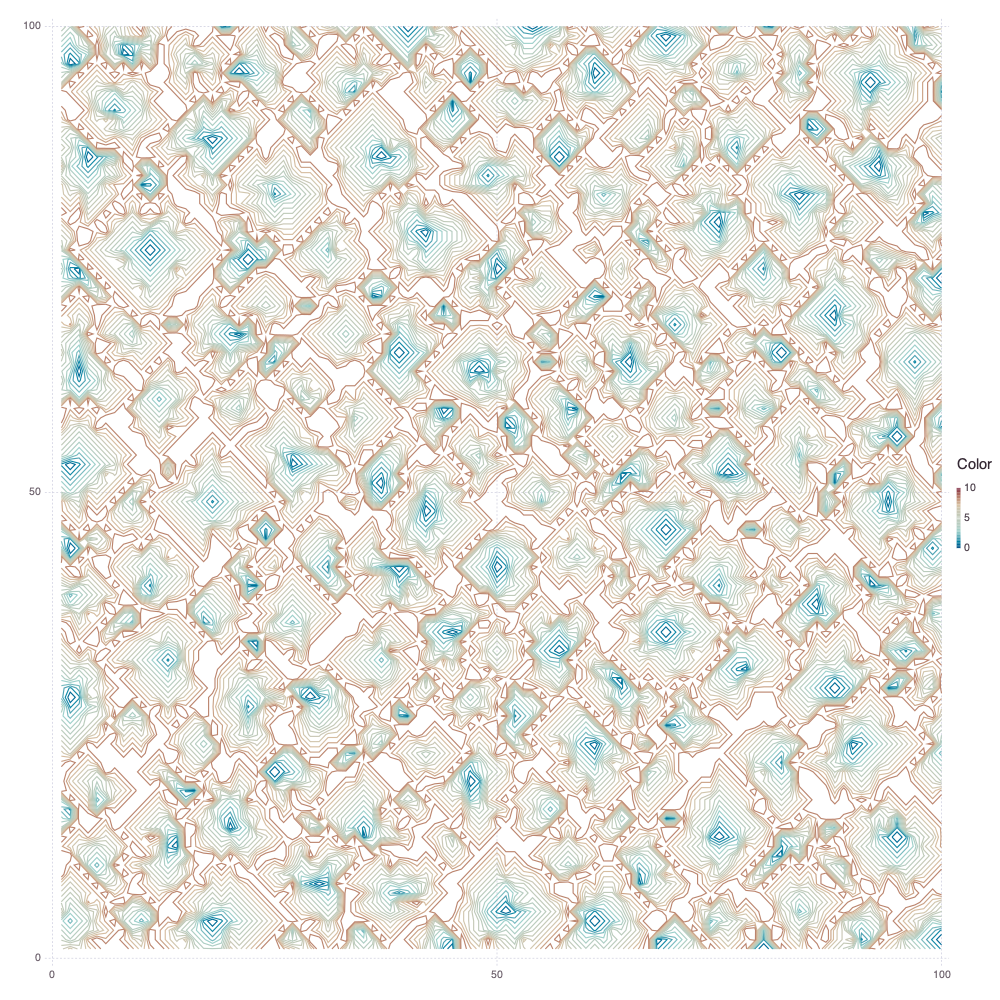

false

In [12]:
draw(PNG(1000px,1000px), plot(z=H, Geom.contour))